In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,mean_squared_error

from io import StringIO
from IPython.display import Image, display
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeRegressor, DecisionTreeClassifier


from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

import warnings
warnings.filterwarnings('ignore')

In [2]:

df = pd.read_csv('dataset/loan_approval_dataset.csv',encoding =('ISO-8859-1'),low_memory =False)
df.shape 

(4269, 13)

In [3]:
df.head()



,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
df.isna().sum()


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop('loan_id',axis=1 ,inplace=True)

In [10]:
# Removing whitespaces from column names
df.columns = df.columns.str.strip()

# Removing white spaces from values in the dataframe
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [11]:
df.self_employed.value_counts()

self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [12]:
df.education.value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [13]:
df.loan_status.value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [14]:
# to convert object to int
df["self_employed"] = df["self_employed"].apply(lambda x: 1 if x == "Yes" else 0)
df["education"] = df["education"].apply(lambda x: 1 if x == "Graduate" else 0)
df["loan_status"] = df["loan_status"].apply(lambda x: 1 if x == "Approved" else 0)

In [15]:
df["loan_status"].unique()

array([1, 0])

In [16]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


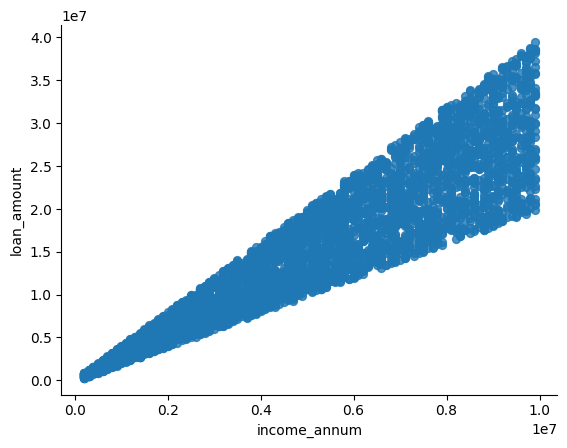

In [17]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='income_annum', y='loan_amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [19]:
x=df.drop(['loan_status'], axis=1)
y=df['loan_status']

In [20]:
np.unique(y)

array([0, 1])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3415, 11)
Shape of X_test: (854, 11)
Shape of y_train: (3415,)
Shape of y_test: (854,)


In [23]:
from sklearn.tree import DecisionTreeClassifier

#decision_tree = DecisionTreeClassifier(max_depth=9, criterion='entropy',min_samples_split= 13, min_samples_leaf= 1,splitter='random', random_state=1)
# Create a DecisionTreeClassifier instance
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
decision_tree.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


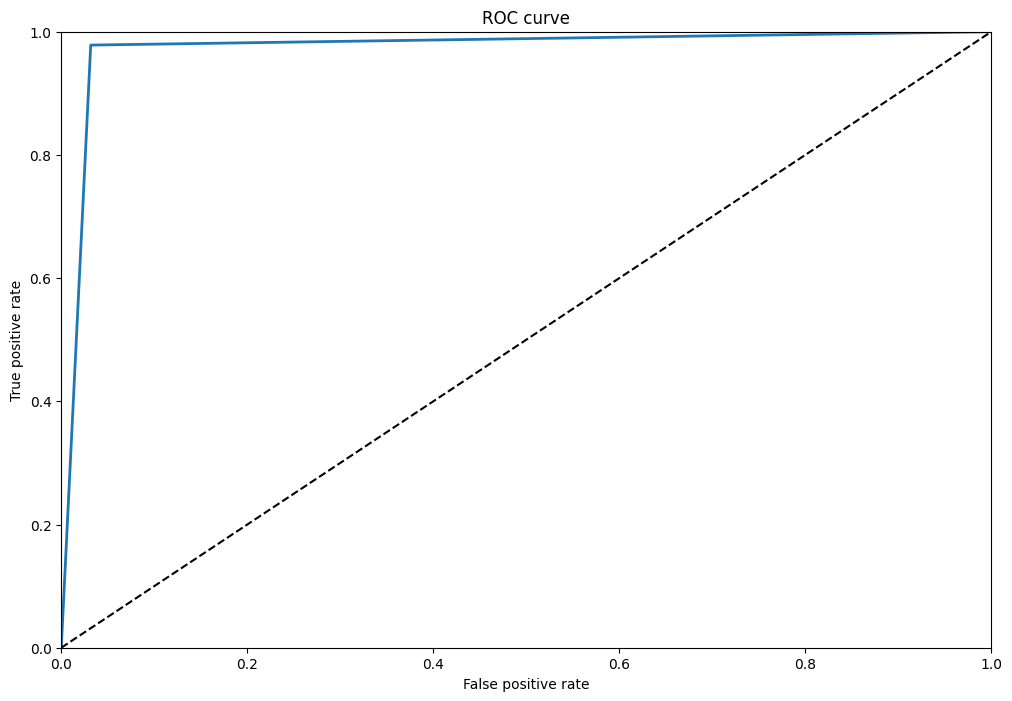

In [24]:
y_scores = cross_val_predict(decision_tree, X_train_scaled, y_train, cv=5)
fpr, tpr, thresholds = roc_curve(y_train,y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,8))
    plt.title('ROC curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

plot_roc_curve(fpr,tpr)
plt.show()

Accuracy: 0.977751756440281


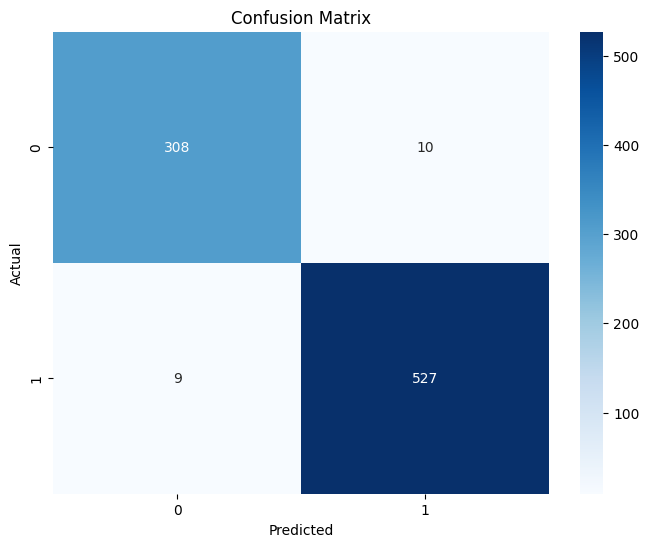

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

In [26]:
#we need to make a function that finds out the score of our training and testing
def M_S(y_real, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_real, y_pred),
                      'precision': precision_score(y_real, y_pred,),
                      'recall': recall_score(y_real, y_pred,),
                      'f1': f1_score(y_real, y_pred,)},
                      name=label)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predictions on training and test data
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Calculate accuracy, precision, and recall on training and test datasets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Display the results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Training Precision:", train_precision)
print("Test Precision:", test_precision)
print("Training Recall:", train_recall)
print("Test Recall:", test_recall)

Training Accuracy: 0.6207906295754027
Test Accuracy: 0.6276346604215457
Training Precision: 0.6207906295754027
Test Precision: 0.6276346604215457
Training Recall: 1.0
Test Recall: 1.0


In [28]:
y_train_pred = decision_tree.predict(X_train_scaled)
y_test_pred = decision_tree.predict(X_test_scaled)

train_test_full_error = pd.concat([M_S(y_train, y_train_pred, 'train'),M_S(y_test, y_test_pred, 'test')],axis=1)
train_test_full_error

,train,test
accuracy,1.0,0.977752
precision,1.0,0.981378
recall,1.0,0.983209
f1,1.0,0.982293


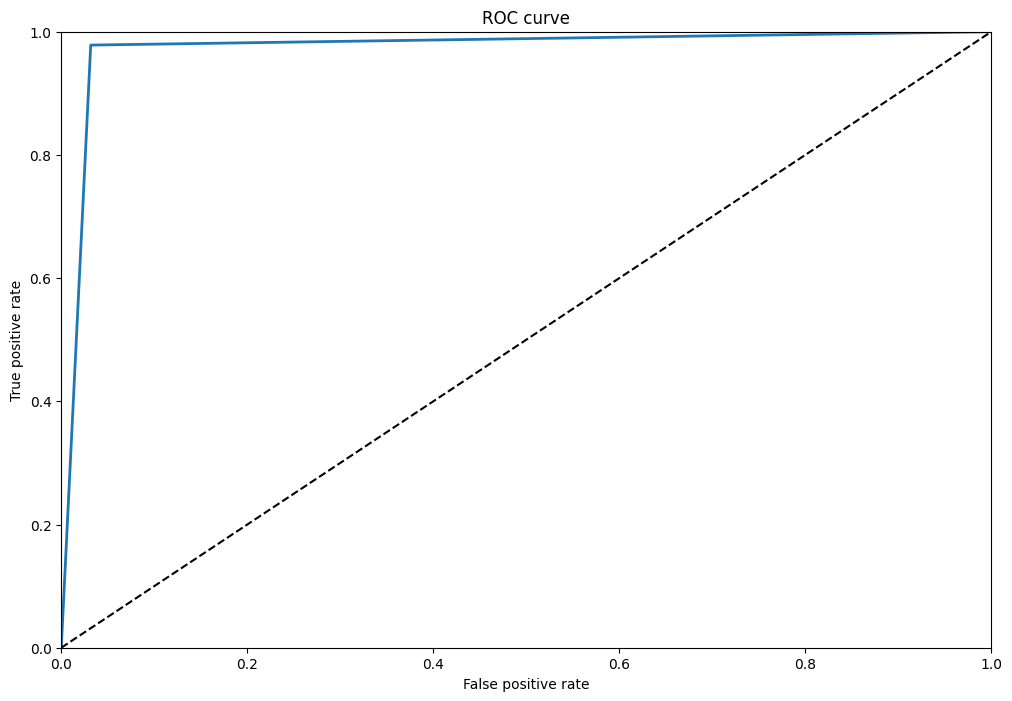

In [29]:
y_scores = cross_val_predict(decision_tree, X_train_scaled, y_train, cv=5,method='predict_proba')
# Get decision scores for the positive class (class 1)
y_scores = y_scores[:, 1]
fpr, tpr, thresholds = roc_curve(y_train,y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,8))
    plt.title('ROC curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

plot_roc_curve(fpr,tpr)
plt.show()

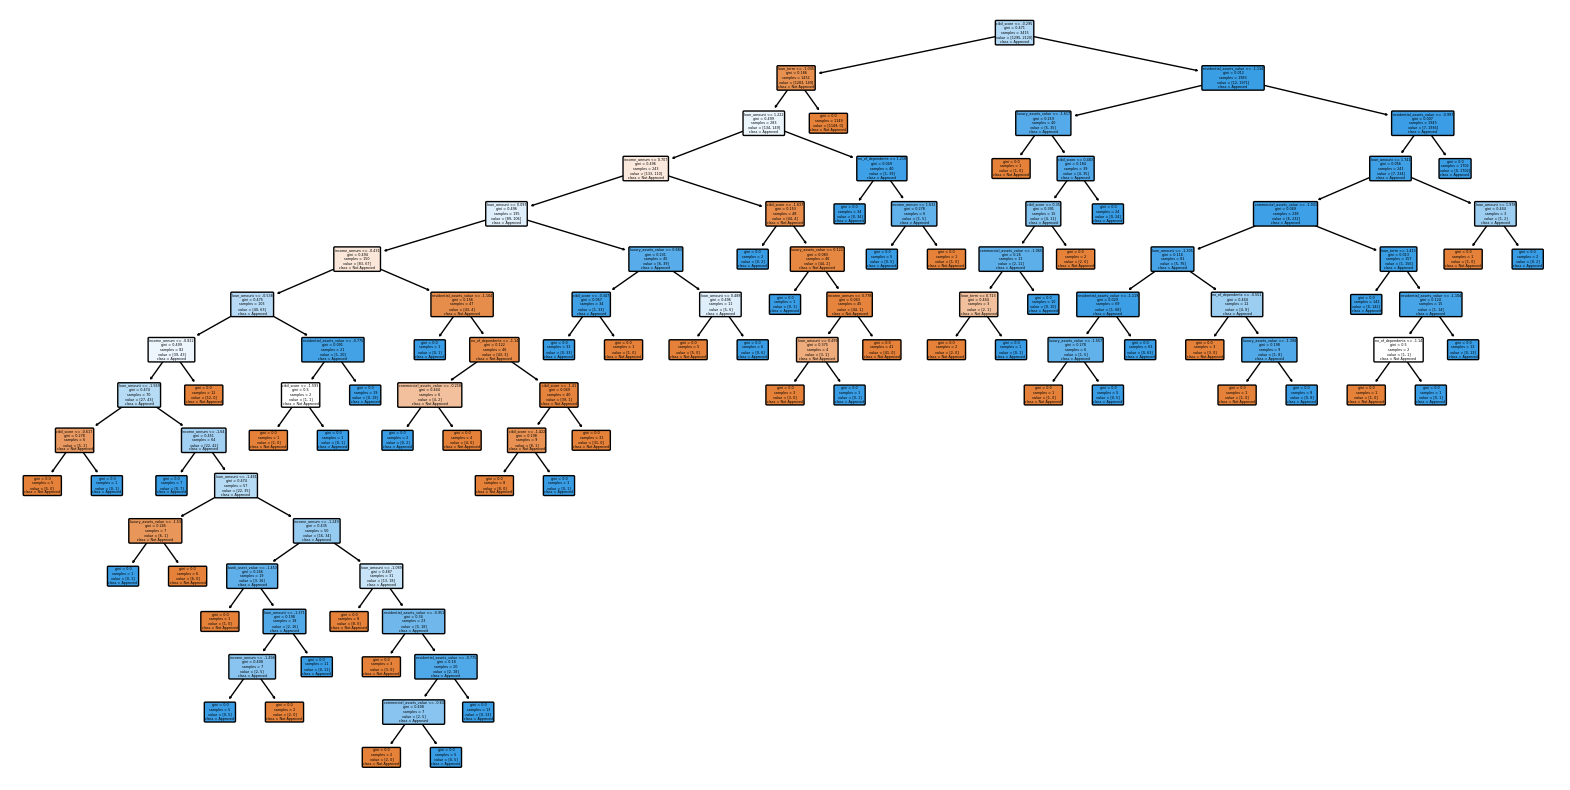

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(decision_tree, feature_names=['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'], class_names=['Not Approved', 'Approved'], filled=True, rounded=True)
plt.show()



In [ ]:
import tkinter as tk 
from tkinter import messagebox
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dummy data for demonstration
x = np.random.rand(100, 11)  # Example features
y = np.random.randint(0, 2, size=(100,))  # Example labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

root = tk.Tk()
root.title("California Housing Prices")
root.geometry("700x300") 
root.config(bg="#f0f0f0") 

header = tk.Label(root, text="Loan Approval", font=('Arial', 18), bg="#4682b4", fg="white")
header.pack(fill="x", pady=10) 

# Sample column names
columns = ['NO Of Dependents', 'Income Annum', 'Loan Amount', 'Loan Term',
           'Cibil Score', 'Residential Assets Value', 'Commercial Assets Value', 'Luxury Assets Value',
           'Bank Asset Value', 'Education', 'Self Employed']
    
# Sample options for Education and Self Employed
education_options = [' Graduate', ' Not Graduate']
self_employed_options = ['Yes', 'No']

# Create a frame to hold labels and entries
frame1 = tk.Frame(root)
frame1.pack()

# Create a list to store the entry widgets
entries = [] 
def validate_numeric_input(action, index, value_if_allowed,
                           prior_value, text, validation_type, trigger_type, widget_name):
    try:
        if text == ".":
            return True
        float(text)  # Try converting text to float
        return True
    except ValueError:
        messagebox.showerror("Error", "Please enter numbers only.")
        return False

for i, column_name in enumerate(columns):
    # Calculate row and column indices
    row = i // 2
    column = i % 2

    # Create label
    label = tk.Label(frame1, text=column_name, bg="#f0f0f0", font=('Arial', 14))
    label.grid(row=row, column=column * 2, padx=5)

    # Create OptionMenu for Education and Self Employed
    if column_name == 'Education':
        education_var = tk.StringVar(root)
        education_var.set(education_options[0])  # Set default value
        education_option_menu = tk.OptionMenu(frame1, education_var, *education_options)
        education_option_menu.grid(row=row, column=column * 2 + 1, padx=5)
    elif column_name == 'Self Employed':
        self_employed_var = tk.StringVar(root)
        self_employed_var.set(self_employed_options[0])  # Set default value
        self_employed_option_menu = tk.OptionMenu(frame1, self_employed_var, *self_employed_options)
        self_employed_option_menu.grid(row=row, column=column * 2 + 1, padx=5)
    else:
        # Create entry
        entry = tk.Entry(frame1, width=10, font=('Arial', 14))
        entry.grid(row=row, column=column * 2 + 1)
        # Allow only numeric input
        validate_numeric = (frame1.register(validate_numeric_input), '%d', '%i', '%P', '%s', '%S', '%v', '%V', '%W')
        entry.config(validate="key", validatecommand=validate_numeric)
        entries.append(entry)  # Append entry widget to the list

def value_selected(var):
    # This function returns the value selected in the OptionMenu
    return var.get()

def loan_status():
    new_data = []
    for i, column_name in enumerate(columns):
        if column_name == 'Education':
            value = value_selected(education_var)
            # Convert to 1 if 'Graduate', otherwise 0
            value = 1 if value == ' Graduate' else 0
        elif column_name == 'Self Employed':
            value = value_selected(self_employed_var)
            # Convert to 1 if 'Yes', otherwise 0
            value = 1 if value == 'Yes' else 0
        else:
            value = entries[i].get()
            if not value.strip():  # Check if the entry is empty or contains only whitespace
                messagebox.showerror("Error", "Please fill in all fields.")
                return
            value = float(value)  # Convert to float

        new_data.append(value)

    # Perform prediction
    decision_tree = DecisionTreeClassifier(random_state=42)

    # Train the model
    decision_tree.fit(X_train, y_train)
    
    # Predict
    predicted_status = decision_tree.predict([new_data])

    # Mapping the predicted value to 'Rejected' or 'Approved'
    status_text = "Rejected" if predicted_status[0] == 0 else "Approved"

    # Display the result
    messagebox.showinfo("Loan Status", f"The predicted loan status is: {status_text}")

predict_btn = tk.Button(root, text="Loan Status", bg="#4682b4", activebackground="light gray",
                        borderwidth=2, command=loan_status, font=('Arial', 14), fg="white" )  
predict_btn.pack(padx=5, pady=5, ipadx=10, ipady=5)  

root.mainloop()
